# Введение в pandas и базовую визуализацию
## чтобы всегда было под рукой

In [ ]:
import pandas as pd
import numpy as np
stdperf = pd.read_csv("StudentsPerformance.csv")
stdperf.tail()

In [2]:
stdperf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
stdperf.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [53]:
stdperf.groupby("gender").aggregate({"writing score" : "mean"})

,writing score
gender,
female,72.467181
male,63.311203


In [3]:
stdperf.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
stdperf.iloc[0:3, 0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none


In [114]:
stdperf_names = stdperf.iloc[[0,3,4,7,8]]
stdperf_names.index = ["Cersei", "Tywin", "Gregor", "Joffrey", "Ilyn Payne"]
stdperf_names

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [43]:
stdperf_names.loc[["Cersei", "Joffrey"],["gender", "writing score"]]

,gender,writing score
Cersei,female,74
Joffrey,male,39


In [48]:
my_series1 = pd.Series([1,2,3], index = ["Cersei", "Tywin", "Gregor"])
my_series2 = pd.Series([4,5,6], index = ["Cersei", "Tywin", "Gregor"])
my_series1

Cersei    1
Tywin     2
Gregor    3
dtype: int64

In [49]:
pd.DataFrame({"col_name_1":my_series1,"col_name_2":my_series2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


In [57]:
stdperf.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [69]:
titanic = pd.read_csv("titanic.csv")
titanic.dtypes.value_counts()
# titanic.info()


object     5
int64      5
float64    2
dtype: int64

In [13]:
# через loc выбираем dataframe, а через метод (.признак) - серию
# stdperf.gender == "female"
stdperf.loc[stdperf.gender == "female", ["gender", "writing score"]]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [19]:
std_mean_ws = stdperf["writing score"].mean()
std_mean_ws

68.054

In [20]:
stdperf.loc[stdperf["writing score"] > std_mean_ws]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [25]:
#для множественных условий нужно разделять условия в () и условные операторы менять на & (|)
query = (stdperf["writing score"] > std_mean_ws) & (stdperf.gender == "female")
stdperf.loc[query].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [69]:
(stdperf["lunch"] == "free/reduced").value_counts()

False    645
True     355
Name: lunch, dtype: int64

In [84]:
stdperf.groupby("lunch").aggregate({"writing score" : "mean", "reading score": "mean", "math score": "mean" })
#stdperf.groupby("lunch").aggregate({"writing score" : "var", "reading score": "var", "math score": "var" })

,writing score,reading score,math score
lunch,,,
free/reduced,63.022535,64.653521,58.921127
standard,70.823256,71.654264,70.034109


In [3]:
stdperf = stdperf.rename(columns = 
                   {"parental level of education" : "parental_level_of_education",
                   "test preparation course"  : "test_preparation_course",
                   "math score" : "math_score",
                   "reading score" : "reading_score",
                   "writing score" : "writing_score"})

In [4]:
stdperf.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [104]:
#через одинарные кавычки указывается булево значение
stdperf.query("gender == 'female' & writing_score > 78")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [112]:
#ручной способ поиска слова
[subj for subj in list(stdperf) if "score" in subj]
#pandas:
stdperf.filter(like = "score")

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [118]:
#ищем букву "е" в строках (ось = 0) или столбцах (ось = 1)
stdperf_names.filter(like = "e", axis =0)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [9]:
#находим топ 5 женщин и топ 5 мужчин по математике 
stdperf.sort_values(["gender", "math_score"], ascending = False ) \
        .groupby("gender").head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [11]:
#добавление новой колонки
stdperf["total_score"] =  stdperf.math_score + stdperf.reading_score + stdperf.writing_score 
stdperf

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [14]:
#для более сложных преобразований:
stdperf = stdperf.assign(total_score_log = np.log(stdperf.total_score))
stdperf.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [15]:
#удаление колонок axis = 1 - удаляем столбец
stdperf.drop(['total_score'], axis = 1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,5.273000
998,female,group D,some college,standard,completed,68,78,77,5.407172


# Visual 
## matplotlib & seaborn

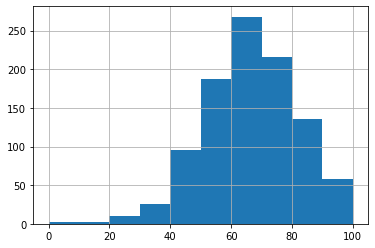

In [7]:
stdperf.math_score.hist()

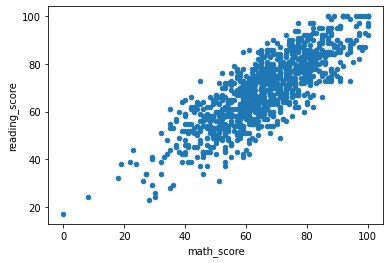

In [8]:
stdperf.plot.scatter(x="math_score", y = "reading_score")

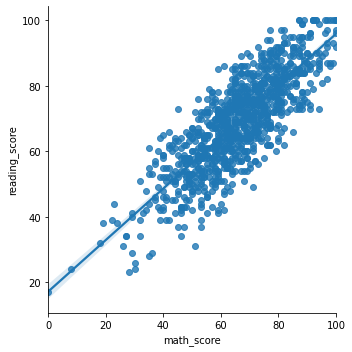

In [9]:
import seaborn as sns
sns.lmplot(x = "math_score", y = "reading_score", data = stdperf)

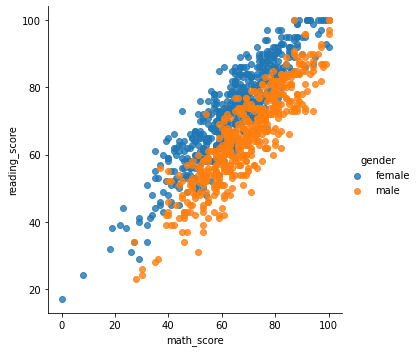

In [12]:
sns.lmplot(x = "math_score", y = "reading_score", hue = "gender", data = stdperf, fit_reg = False)

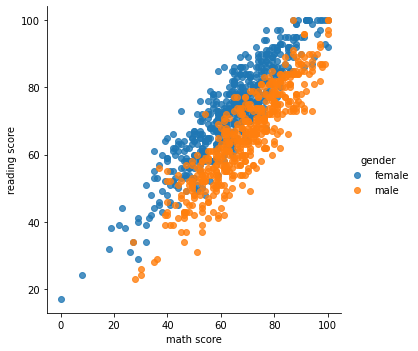

In [13]:
ax = sns.lmplot(x = "math_score", y = "reading_score", hue = "gender", data = stdperf, fit_reg = False)
ax.set_xlabels("math score")
ax.set_ylabels("reading score")

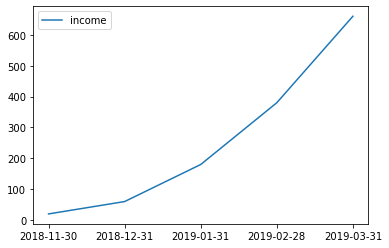

In [22]:
inc = pd.read_csv("income.csv")
sns.lineplot(data=inc)

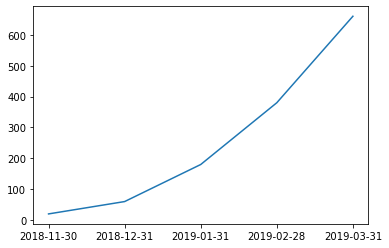

In [25]:
import matplotlib.pyplot as plt
plt.plot(inc.index, inc.income)

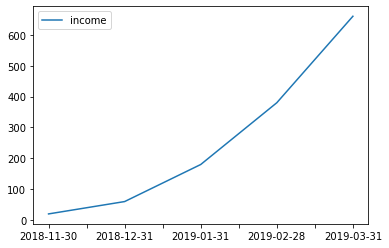

In [26]:
inc.plot(kind = "line")

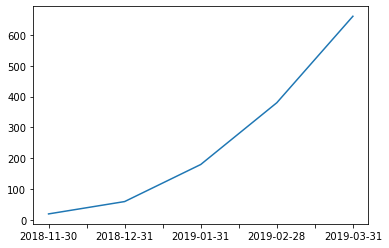

In [27]:
inc.income.plot()

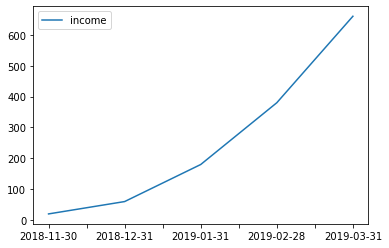

In [29]:
inc.plot()

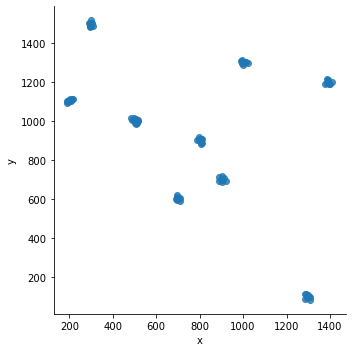

In [43]:
datta = pd.read_csv("dataset_209770_6.txt", sep=" ")
sns.lmplot(x = "x", y = "y", data = datta, fit_reg = False)

In [50]:
dutta = pd.read_csv('genome_matrix.csv', index_col=0)
sns.heatmap(dutta, cmap="viridis")

In [56]:
dota = pd.read_csv("dota_hero_stats.csv")
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


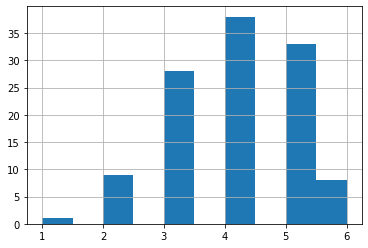

In [75]:
dota['cnt'] = dota.roles.str.count(',') + 1
dota['cnt'].hist()

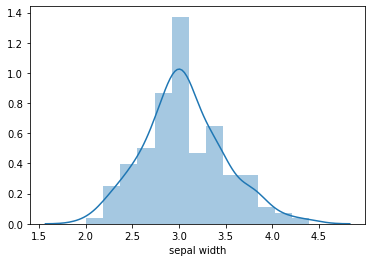

In [87]:
iris_data = pd.read_csv("iris.csv")
sns.distplot(iris_data["sepal width"])
sns.distplot(iris_data["petal length"])

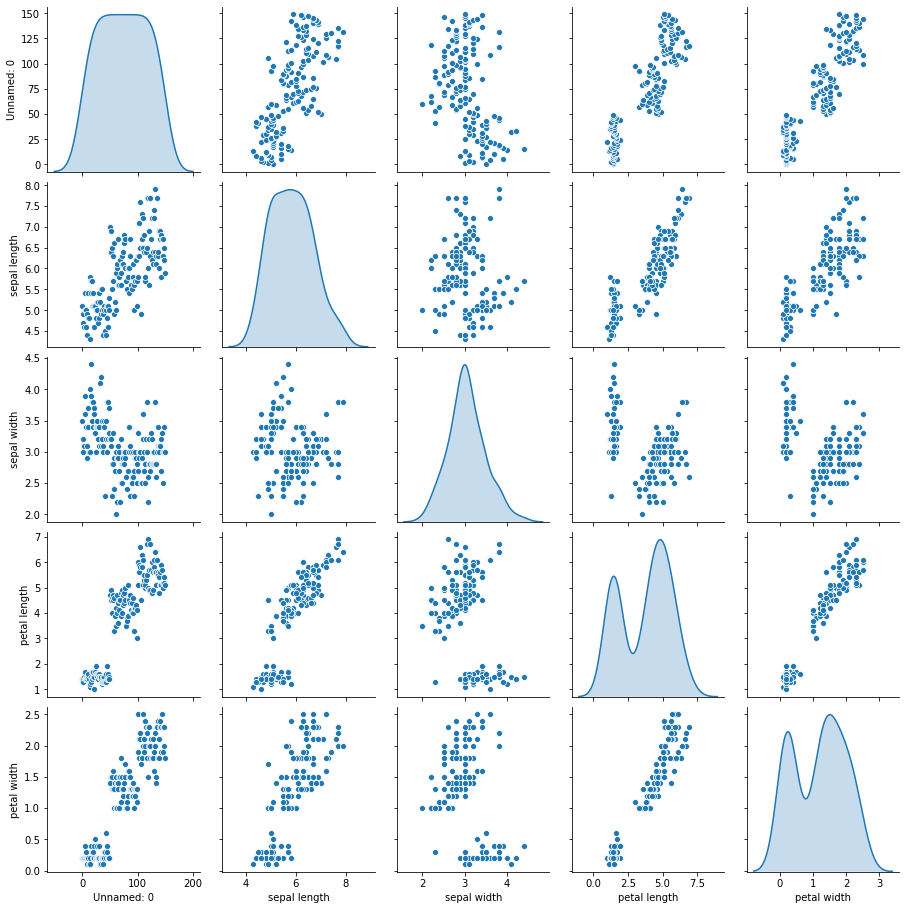

In [91]:
sns.pairplot(iris_data,  vars=iris_data.columns[:-1], diag_kind='kde')

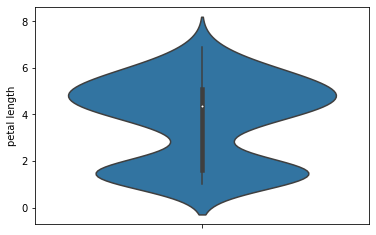

In [94]:
sns.violinplot(iris_data['petal length'], orient='v');

In [ ]:
#rolling() - выбор поднабора данных, удобно для временных рядов + можно применять следующую ф-ю, напр. df.rolling().mean()